In [245]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../code')
from read_files import *
from stats import *
from plots import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [182]:
report_paths = {x:f"../data/{x}/{x}_report.tsv" for x in ["SRR5088813", "SRR5088814", "SRR5088815", "SRR5088816", "SRR5088817", "SRR5088818", "SRR5088822", "SRR5088823", "SRR5088824", "SRR5088825", "SRR5088829", "SRR5088830", "SRR5088831", "SRR5088832" ]}

reports_dfs = pd.Series(
    {sample:read_trust_report_file_with_header(path).assign(sample=sample) for sample, path in report_paths.items()})

cyto_score = get_cyto_score()

In [131]:
data = get_vdjc_aggregated(reports_dfs)
data

variable           C                                                    \
value              .     IGHA1     IGHA2      IGHD      IGHE     IGHG1   
sample                                                                   
SRR5088813  0.456019  0.149341  0.000194  0.000000  0.040341  0.739333   
SRR5088814  0.978329  0.078167  0.000000  0.000000  0.000000  0.415094   
SRR5088815  0.614690  0.044776  0.000000  0.000000  0.000000  0.641791   
SRR5088816  0.777679  0.000000  0.000000  0.000000  0.000000  0.468750   
SRR5088817  0.743986  0.027796  0.000000  0.000000  0.000000  0.777597   
SRR5088818  0.532769  0.139804  0.000000  0.000000  0.000000  0.742937   
SRR5088822  0.733390  0.023179  0.000000  0.000000  0.000000  0.637364   
SRR5088823  0.544918  0.014328  0.001226  0.000000  0.000000  0.730928   
SRR5088824  0.451645  0.012682  0.002849  0.000647  0.000000  0.920418   
SRR5088825  0.271211  0.031898  0.009389  0.000187  0.000000  0.869445   
SRR5088829  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
SRR5088830  0.809895  0.076604  0.000000  0.000000  0.000000  0.854599   
SRR5088831  0.575080  0.236419  0.019128  0.000000  0.000000  0.713083   
SRR5088832  0.392282  0.118644  0.000000  0.000000  0.000000  0.711864   

variable                                            ...          V            \
value          IGHG2     IGHG3     IGHG4      IGHM  ... TRBV7-9*07  TRBV9*01   
sample                                              ...                        
SRR5088813  0.004073  0.001746  0.000000  0.006982  ...   0.011299  0.022599   
SRR5088814  0.137466  0.000000  0.000000  0.150943  ...   0.000000  0.181818   
SRR5088815  0.000000  0.000000  0.000000  0.067164  ...   0.000000  0.022222   
SRR5088816  0.000000  0.000000  0.000000  0.125000  ...   0.000000  0.018868   
SRR5088817  0.074160  0.003691  0.010621  0.022523  ...   0.029240  0.000000   
SRR5088818  0.002489  0.008052  0.001171  0.001464  ...   0.000000  0.031250   
SRR5088822  0.052019  0.001709  0.046571  0.005768  ...   0.000000  0.000000   
SRR5088823  0.070866  0.019362  0.073900  0.002711  ...   0.000000  0.011976   
SRR5088824  0.031109  0.010703  0.004743  0.002864  ...   0.000000  0.047619   
SRR5088825  0.050841  0.004104  0.001990  0.000684  ...   0.000000  0.004990   
SRR5088829  0.000000  0.000000  0.000000  0.000000  ...   0.000000  0.000000   
SRR5088830  0.021957  0.003172  0.030251  0.004391  ...   0.000000  0.000000   
SRR5088831  0.000000  0.000000  0.000000  0.000000  ...   0.000000  0.000000   
SRR5088832  0.079096  0.000000  0.000000  0.000000  ...   0.000000  0.000000   

variable                                                               \
value      TRDV1*01 TRGV10*01 TRGV10*02  TRGV2*01  TRGV3*01  TRGV4*01   
sample                                                                  
SRR5088813      0.0  0.818182  0.090909  0.000000  0.000000  0.000000   
SRR5088814      0.0  0.000000  1.000000  0.000000  0.000000  0.000000   
SRR5088815      1.0  0.000000  0.375000  0.500000  0.125000  0.000000   
SRR5088816      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
SRR5088817      0.0  0.000000  0.000000  0.800000  0.000000  0.075000   
SRR5088818      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
SRR5088822      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
SRR5088823      0.0  0.000000  0.750000  0.000000  0.000000  0.125000   
SRR5088824      0.0  0.000000  0.707317  0.097561  0.121951  0.073171   
SRR5088825      0.0  0.133333  0.133333  0.000000  0.133333  0.266667   
SRR5088829      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
SRR5088830      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
SRR5088831      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
SRR5088832      0.0  0.000000  0.052632  0.000000  0.473684  0.052632   

variable                        
value       TRGV8*01  TRGV9*01  
sample                          
SRR5088813  0.000000  0.090909  
SRR508

# V / J Genes

In [151]:
VJ_genes = get_vj_genes_freq(reports_dfs)
pairs_dist = get_vj_genes_pairs_dist(VJ_genes)

### Interactions

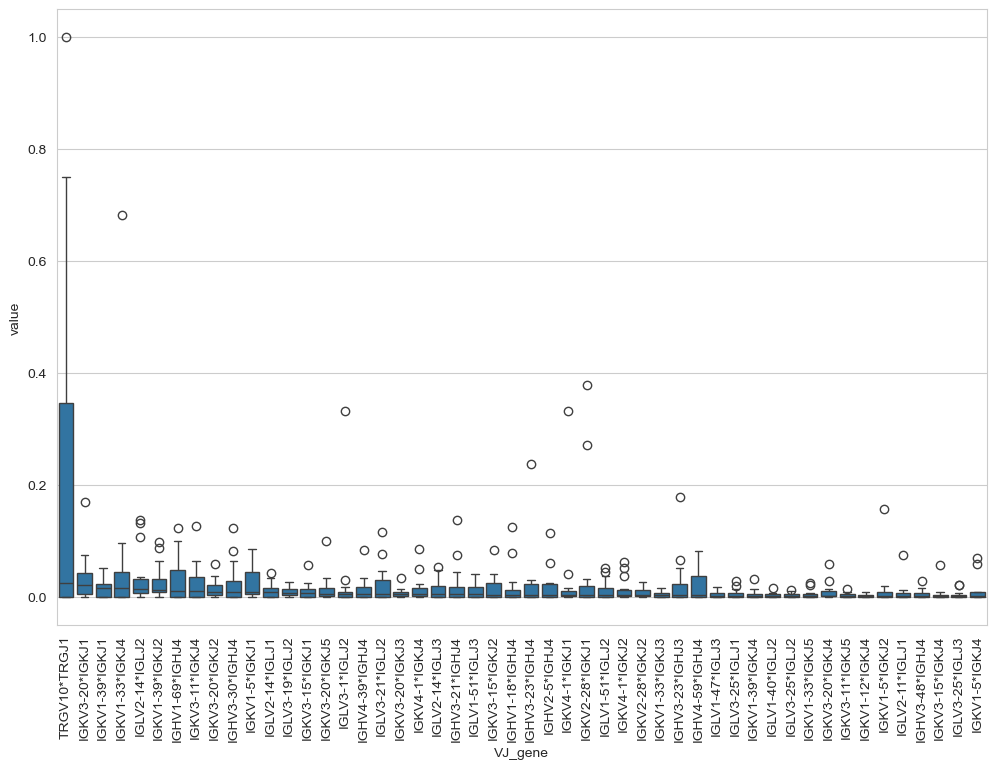

In [152]:
plot_max_interactions_boxplot(pairs_dist, 50)

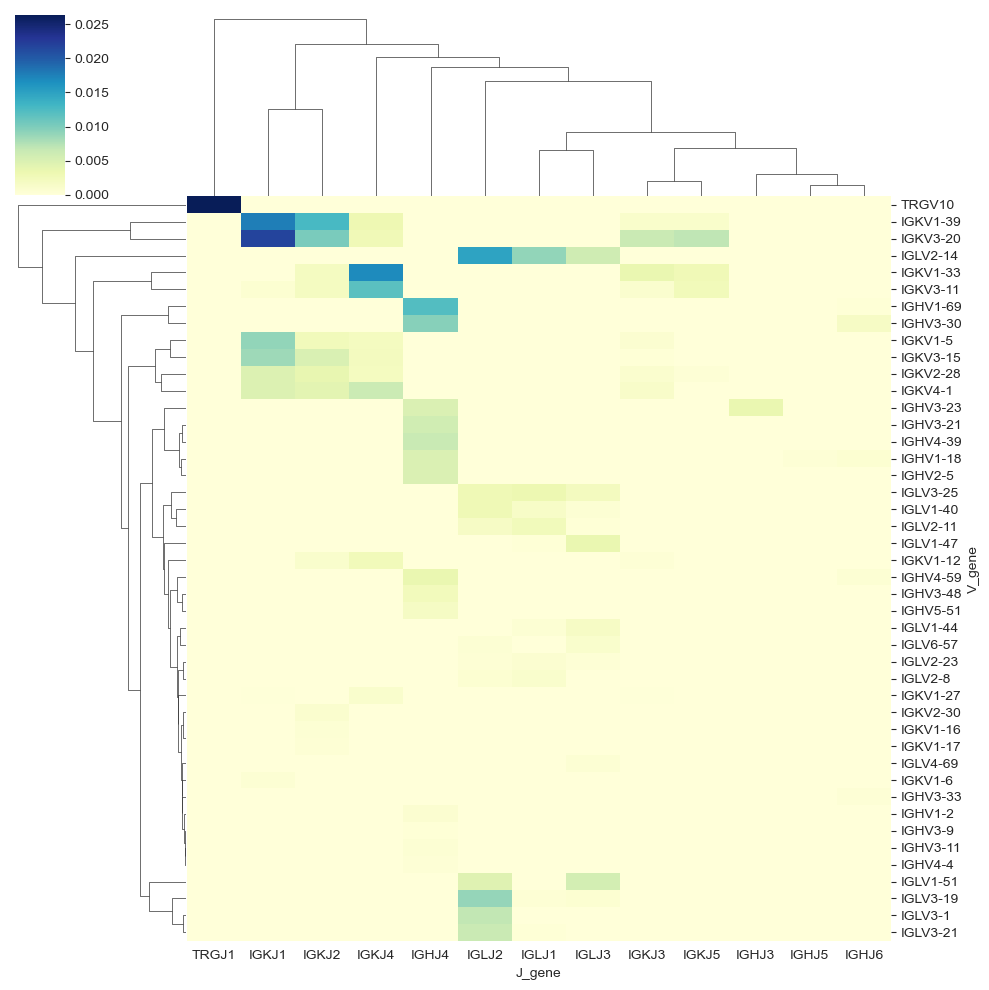

In [159]:
plot_max_interactions_clustermap(pairs_dist, 100)

### gene analysis

In [169]:
V_genes = VJ_genes.groupby(['sample', 'V_gene']).sum().reset_index('V_gene').query('V_gene != "."')
J_genes = VJ_genes.groupby(['sample', 'J_gene']).sum().reset_index('J_gene').query('J_gene != "."')

In [ ]:
V_genes_describe = V_genes.groupby('V_gene')['frequency'].describe()\
    .sort_values(by='50%', ascending=False)
V_genes_describe['family'] = V_genes_describe.index.str[:3]
V_genes_describe.groupby('family').apply(lambda df: display(df.head(3)))


,count,mean,std,min,25%,50%,75%,max,family
V_gene,,,,,,,,,
IGHV3-30,9.0,0.084663,0.057893,0.010234,0.057146,0.065122,0.093437,0.199352,IGH
IGHV1-69,11.0,0.079383,0.062966,0.002087,0.029585,0.063689,0.121592,0.206853,IGH
IGHV3-23,10.0,0.095075,0.071414,0.033257,0.039208,0.062906,0.132871,0.237950,IGH


,count,mean,std,min,25%,50%,75%,max,family
V_gene,,,,,,,,,
IGKV1-39,13.0,0.072533,0.029998,0.027947,0.042380,0.087871,0.097956,0.109432,IGK
IGKV3-20,13.0,0.092760,0.062435,0.024922,0.054336,0.066870,0.143573,0.206744,IGK
IGKV3-15,12.0,0.052796,0.041876,0.005810,0.012929,0.057357,0.077885,0.131336,IGK


,count,mean,std,min,25%,50%,75%,max,family
V_gene,,,,,,,,,
IGLV2-14,13.0,0.068831,0.065160,0.001703,0.028732,0.044492,0.086987,0.178055,IGL
IGLV1-51,13.0,0.027259,0.018718,0.001216,0.011921,0.030004,0.042707,0.052959,IGL
IGLV3-21,11.0,0.038827,0.035756,0.004436,0.016614,0.021654,0.050667,0.118012,IGL


,count,mean,std,min,25%,50%,75%,max,family
V_gene,,,,,,,,,
TRAV12-1,6.0,0.154522,0.128449,0.028846,0.095979,0.122393,0.155344,0.400000,TRA
TRAV13-1,9.0,0.140770,0.065308,0.011364,0.114286,0.120000,0.197115,0.207792,TRA
TRAV12-2,8.0,0.127561,0.108554,0.038961,0.054364,0.109450,0.135218,0.375000,TRA


,count,mean,std,min,25%,50%,75%,max,family
V_gene,,,,,,,,,
TRBV11-1,2.0,0.270000,0.325269,0.040000,0.155000,0.270000,0.385000,0.500000,TRB
TRBV6-7,2.0,0.189621,0.203240,0.045908,0.117764,0.189621,0.261477,0.333333,TRB
TRBV12-4,1.0,0.105556,NaN,0.105556,0.105556,0.105556,0.105556,0.105556,TRB


,count,mean,std,min,25%,50%,75%,max,family
V_gene,,,,,,,,,
TRDV1,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,TRD


,count,mean,std,min,25%,50%,75%,max,family
V_gene,,,,,,,,,
TRGV10,7.0,0.580101,0.353113,0.052632,0.320833,0.707317,0.829545,1.0,TRG
TRGV2,3.0,0.465854,0.352462,0.097561,0.298780,0.500000,0.650000,0.8,TRG
TRGV8,3.0,0.495906,0.471148,0.066667,0.243860,0.421053,0.710526,1.0,TRG


/var/folders/_n/k7yj8dgj6ps_bq2j3zpk07vc0000gn/T/ipykernel_96151/1045309311.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  V_genes_describe.groupby('family').apply(lambda df: display(df.head(3)))


""


In [180]:
J_genes_describe = J_genes.groupby('J_gene')['frequency'].describe().sort_values(by='50%', ascending=False)
J_genes_describe['family'] = J_genes_describe.index.str[:3]
J_genes_describe.groupby('family').apply(lambda df: display(df.head(3)))

,count,mean,std,min,25%,50%,75%,max,family
J_gene,,,,,,,,,
IGHJ4,13.0,0.448440,0.245676,0.048304,0.246269,0.493406,0.566038,0.940321,IGH
IGHJ6,12.0,0.221245,0.130312,0.007463,0.166043,0.207760,0.317344,0.468750,IGH
IGHJ3,11.0,0.134742,0.122173,0.028788,0.085526,0.103957,0.134870,0.477612,IGH


,count,mean,std,min,25%,50%,75%,max,family
J_gene,,,,,,,,,
IGKJ4,14.0,0.205463,0.172634,0.023161,0.089024,0.211430,0.257963,0.700444,IGK
IGKJ1,14.0,0.205169,0.117559,0.024833,0.128288,0.196219,0.220509,0.416667,IGK
IGKJ2,14.0,0.162369,0.047385,0.057828,0.141692,0.164973,0.183158,0.264797,IGK


,count,mean,std,min,25%,50%,75%,max,family
J_gene,,,,,,,,,
IGLJ2,14.0,0.157367,0.081200,0.056004,0.099055,0.150578,0.185404,0.333333,IGL
IGLJ3,13.0,0.082462,0.051648,0.001737,0.045910,0.069875,0.129022,0.162091,IGL
IGLJ1,13.0,0.066040,0.026906,0.012262,0.049097,0.065867,0.081357,0.112853,IGL


,count,mean,std,min,25%,50%,75%,max,family
J_gene,,,,,,,,,
TRAJ40,6.0,0.091643,0.054560,0.026316,0.046228,0.093205,0.140016,0.150943,TRA
TRAJ45,8.0,0.079053,0.065508,0.004438,0.035293,0.074047,0.108947,0.200000,TRA
TRAJ49,6.0,0.232141,0.384101,0.004808,0.027746,0.073760,0.189521,1.000000,TRA


,count,mean,std,min,25%,50%,75%,max,family
J_gene,,,,,,,,,
TRBJ2-1,13.0,0.208726,0.107624,0.064327,0.122222,0.181818,0.333333,0.358491,TRB
TRBJ1-1,13.0,0.204341,0.156802,0.020000,0.094340,0.173653,0.216374,0.611111,TRB
TRBJ2-7,11.0,0.165901,0.084716,0.059880,0.109554,0.136364,0.231603,0.293785,TRB


,count,mean,std,min,25%,50%,75%,max,family
J_gene,,,,,,,,,
TRDJ1,1.0,0.004808,NaN,0.004808,0.004808,0.004808,0.004808,0.004808,TRD


,count,mean,std,min,25%,50%,75%,max,family
J_gene,,,,,,,,,
TRGJ1,9.0,0.909091,0.272727,0.181818,1.000000,1.000000,1.000000,1.000000,TRG
TRGJP1,1.0,0.454545,NaN,0.454545,0.454545,0.454545,0.454545,0.454545,TRG
TRGJP2,1.0,0.363636,NaN,0.363636,0.363636,0.363636,0.363636,0.363636,TRG


/var/folders/_n/k7yj8dgj6ps_bq2j3zpk07vc0000gn/T/ipykernel_96151/1043176586.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  J_genes_describe.groupby('family').apply(lambda df: display(df.head(3)))


""


# Change

In [253]:
compare_genes_thought_test(V_genes, 'V_gene')

,pvalue
V_gene,
IGKV1-39,0.015625
IGLV2-14,0.046875
IGKV2D-29,0.062500
IGLV1-47,0.062500
IGLV2-23,0.062500
...,...
IGKV3D-20,1.000000
IGHV4-30-2,1.000000
TRAV26-2,1.000000


In [254]:
compare_genes_thought_test(J_genes, 'J_gene')

,pvalue
J_gene,
IGKJ3,0.015625
TRAJ6,0.062500
TRGJ1,0.125000
TRAJ42,0.125000
TRAJ58,0.125000
...,...
TRAJ45,1.000000
TRAJ16,1.000000
TRAJ52,1.000000
